In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from pydantic_core import Url


cols = np.arange(1,6,1)
dados = np.loadtxt('https://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv',delimiter=',',usecols=cols,skiprows=1)
dados

array([[  2.96,  86.76, 172.  ,  85.  ,   2.  ],
       [  3.91,  88.05, 166.  ,  78.  ,   3.  ],
       [  4.42,  95.17, 156.  ,  81.  ,   2.  ],
       ...,
       [ 15.59, 256.5 , 168.  ,  82.  ,  20.  ],
       [ 15.92, 260.14, 142.  ,  72.  ,  11.  ],
       [ 16.45, 261.51, 152.  ,  74.  ,   2.  ]])

In [4]:
diametro_laranja = dados[:5000,0]
diametro_toranja = dados[5000:,0]
peso_laranja = dados[:5000,1]
peso_toranja = dados[5000:,1]

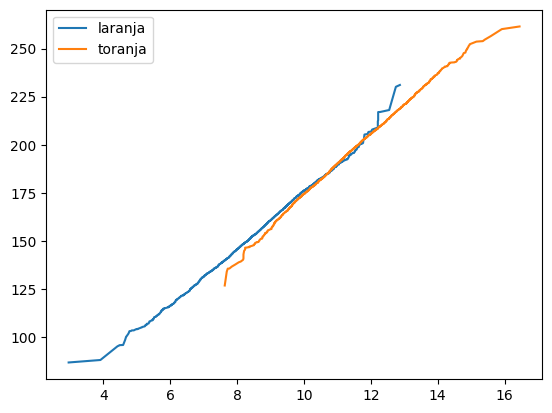

In [5]:
plt.plot(diametro_laranja, peso_laranja)
plt.plot(diametro_toranja, peso_toranja)
plt.legend(['laranja', 'toranja'])

In [7]:
sum(np.isnan(diametro_laranja))

0

In [8]:
sum(np.isnan(diametro_toranja))

0

In [11]:
sum(np.isnan(peso_laranja))

0

In [12]:
sum(np.isnan(peso_toranja))

0

In [14]:
Y_laranja = peso_laranja
Y_toranja = peso_toranja
X_laranja = diametro_laranja
X_toranja = diametro_toranja
n_laranja = np.size(Y_laranja)
n_toranja = np.size(Y_toranja)

In [16]:
X_laranja**2
X_toranja**2

array([ 58.2169,  59.1361,  59.5984, ..., 243.0481, 253.4464, 270.6025])

In [18]:
def calculate_angular_coeficient(X,Y,n):
    return (n*np.sum(X*Y) - np.sum(X)*np.sum(Y))/(n*np.sum(X**2) - np.sum(X)**2)

a_laranja = calculate_angular_coeficient(X_laranja,Y_laranja,n_laranja)
a_toranja = calculate_angular_coeficient(X_toranja,Y_toranja,n_toranja)

In [20]:
def calculate_linear_coeficient(X,Y,a):
    return np.mean(Y)-a*np.mean(X)

b_laranja = calculate_linear_coeficient(X_laranja,Y_laranja,a_laranja)
b_toranja = calculate_linear_coeficient(X_toranja,Y_toranja,a_toranja)

Laranja = 46.32284523962465
Toranja = 3146.4816906016877


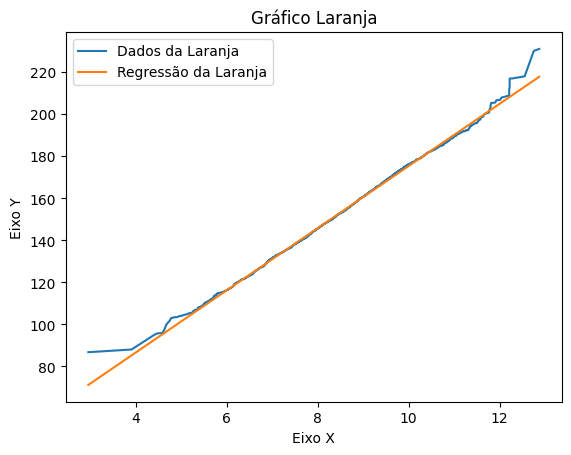

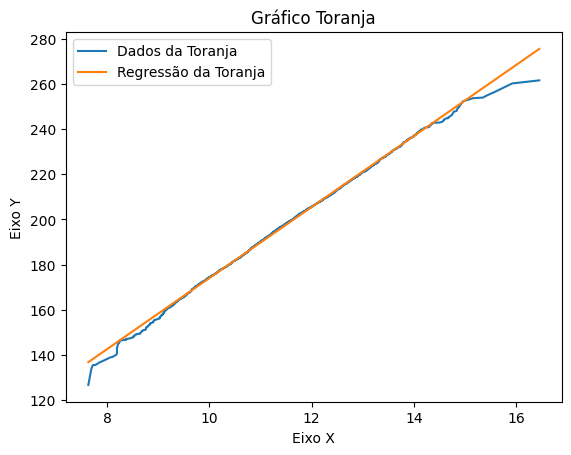

In [24]:
def calculate_y(x,a,b):
    return a*x+b

def plot_linear_chart(x,y,a,b,fruit):

    fig, ax = plt.subplots()

    Y = calculate_y(x,a,b)

    ax.plot(x, y, label=f'Dados da {fruit}')
    ax.plot(x, Y, label=f'Regressão da {fruit}')

    # Adicionar título, rótulos etc.
    ax.set_title(f'Gráfico {fruit}')
    ax.set_xlabel('Eixo X')
    ax.set_ylabel('Eixo Y')
    ax.legend()

    # Mostrar o gráfico
    plt.show()

print(f'Laranja = {np.linalg.norm(Y_laranja-calculate_y(X_laranja,a_laranja,b_laranja))}')
print(f'Toranja = {np.linalg.norm(Y_laranja-calculate_y(X_toranja,a_toranja,b_toranja))}')

plot_linear_chart(X_laranja,Y_laranja,a_laranja,b_laranja,'Laranja')
plot_linear_chart(X_toranja,Y_toranja,a_toranja,b_toranja,'Toranja')